In [1]:
import sys                                        
import os                                         
                                                  
os.nice(20)                                       
                                                  
import warnings                                   
warnings.filterwarnings("ignore")                 
                                                                                                                                                
import numpy as np                                
import pandas as pd                               
import matplotlib.pyplot as plt      
import matplotlib.ticker as ticker
from matplotlib.ticker import ScalarFormatter
                                                  
# Local helper script                             
#hnlDIR = os.environ['HNLPATH']                
sys.path.append('./')   
                                                 
from Plotting import *                            
from Dictionary import *                                               

In [2]:
m = 'm4'
u = 'Um42'

In [3]:
SIN = pd.read_table("./SIN.dat", sep=",")
PIENU = pd.read_table("./PIENU_2019_highT.dat", sep=",")

KEK = pd.read_table("./KEK_mu.dat", sep="\s+")
KEK1982 = pd.read_table("./KEK_1982.dat", sep="\s+")

T2K = pd.read_table("./t2k.dat", sep="\s+")
E949 = pd.read_table("./E949.dat", sep=",")

In [4]:
NA62 = pd.read_table("./NA62_2021_mu.dat", sep="\s+")
NA62[u] = NA62[u]/np.sqrt(2)

In [5]:
PS191 = pd.read_table("./PS191_new.txt", sep=",")
PS191[u] =PS191[u]/np.sqrt(2)
#PS191 = PS191[PS191[m] <= 350]
#PS191 = PS191.sort_values(by=[m]).reset_index()

In [6]:
NuTeV = pd.read_table("./NuTeV.dat", sep="\s+")
NuTeV[m] =NuTeV[m]*1000
NuTeV = NuTeV[NuTeV[u] < 10**-4]
NuTeV = NuTeV.sort_values(by=[m]).reset_index()

In [7]:
#uBooNE2019 = pd.read_table("./uBooNE_2019.dat", sep="\s+")
uBooNE2022 = pd.read_table("./uBooNE_2022.dat", sep="\s+")
uBooNE2023 = pd.read_table("./uBooNE_2023.dat", sep="\s+")
uBooNE = pd.concat([uBooNE2022, uBooNE2023]).sort_values(by=[m]).reset_index()

In [8]:
def plot_contour(exp, label, c, ax , ls):
    dfx = exp[m]
    dfy = exp[u]
    
    plot_line(
            dfx, dfy,
            ax,
            xlimmin = 0, xlimmax = 245,
            color = c,
            linestyle = ls, lw = 2,
            ifysci = True,
            iflabelbox = True, label = label, 
            )

    plot_line(
            [exp[m].iloc[0], exp[m].iloc[0]], [exp[u].iloc[0], 10**-2],
            ax,
            xlimmin = 0, xlimmax = 245,
            color = c,
            linestyle = ls, lw = 2,
            ifysci = True,
            )
    
    plot_line(
            [exp[m].iloc[-1], exp[m].iloc[-1]], [exp[u].iloc[-1], 10**-2],
            ax,
            xlimmin = 0, xlimmax = 245,
            color = c,
            linestyle = ls, lw = 2,
            ifysci = True,
            )
    
    ax.fill_between(dfx, dfy, 10e-2, color=c, alpha=.035)

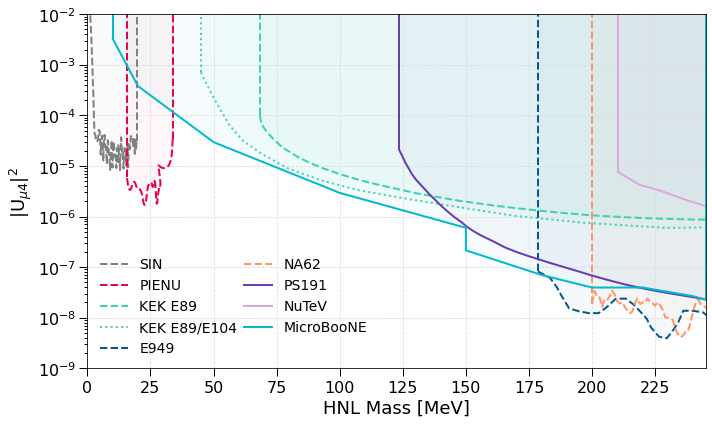

In [9]:
fig, ax = plt.subplots(1,1, figsize=(10,6))

#-------------------------------------------------------------------
plot_contour(SIN, "SIN", 'grey', ax ,'--')
plot_contour(PIENU, "PIENU", col_dict['Coral'], ax,'--')

#-------------------------------------------------------------------

plot_contour(KEK1982, "KEK E89", col_dict['Spearmint'], ax,'--')
plot_contour(KEK, "KEK E89/E104", col_dict['Spearmint'], ax,'dotted')
plot_contour(E949, "E949", col_dict['Teal'], ax,'--')
plot_contour(NA62, "NA62", col_dict['Peach'], ax,'--')

#-------------------------------------------------------------------
plot_contour(PS191, "PS191", col_dict['Mauve'], ax,'-')
#plot_contour(T2K, "T2K", col_dict['MintGreen'], ax,'-')
plot_contour(NuTeV, "NuTeV", col_dict['Lavender'], ax,'-')
plot_contour(uBooNE2023, "MicroBooNE", col_dict['Aqua'], ax,'-')

#-------------------------------------------------------------------
plt.grid(color='gainsboro', linestyle='--')
plt.xlim(0, 245)
plt.ylim(10**-9, 10**-2)
ax.tick_params(bottom = True, top = False, left = True, right = False) 
plt.legend(ncol=2, loc="lower left",fontsize =14, frameon=False, columnspacing=0.5)


#-------------------------------------------------------------------
ax.set_xlabel("HNL Mass [MeV]", fontsize =18)
ax.set_ylabel("|U$_{\mu4}$|$^2$", fontsize =18)
#-------------------------------------------------------------------
ax.xaxis.set_major_locator(MaxNLocator(10))
ax.yaxis.get_major_locator().set_params(numticks=99)
ax.yaxis.get_minor_locator().set_params(numticks=99)#, subs=[.2, .4, .6, .8])

#-------------------------------------------------------------------
fig.tight_layout()
pltname = "SBND_Simulated_Sensitivity"

plt.savefig("sensitivity.png",dpi=200)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


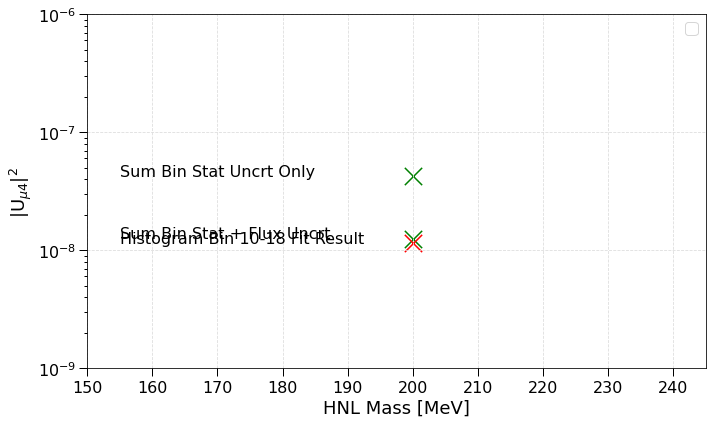

In [38]:
fig, ax = plt.subplots(1,1, figsize=(10,6))

#-------------------------------------------------------------------
plot_contour(SIN, "", 'grey', ax ,'--')
#plot_contour(PIENU, "PIENU", col_dict['Coral'], ax,'--')

#-------------------------------------------------------------------

#plot_contour(KEK1982, "KEK E89", col_dict['Spearmint'], ax,'--')
#plot_contour(KEK, "KEK E89/E104", col_dict['Spearmint'], ax,'dotted')
#plot_contour(E949, "E949", col_dict['Teal'], ax,'--')
#plot_contour(NA62, "NA62", col_dict['Peach'], ax,'--')

#-------------------------------------------------------------------
#plot_contour(PS191, "PS191", col_dict['Mauve'], ax,'-')
#plot_contour(T2K, "T2K", col_dict['MintGreen'], ax,'-')
#plot_contour(NuTeV, "NuTeV", col_dict['Lavender'], ax,'-')
#plot_contour(uBooNE2023, "MicroBooNE", col_dict['Aqua'], ax,'-')

#-------------------------------------------------------------------
plt.grid(color='gainsboro', linestyle='--')
plt.xlim(150, 245)
plt.ylim(10**-9, 10**-2)
ax.tick_params(bottom = True, top = False, left = True, right = False) 
#plt.legend(ncol=2, loc="lower left",fontsize =14, frameon=False, columnspacing=0.5)
#-------------------------------------------------------------------
#Plot limit at mass = 200
M = 200

#-------------------------------------------------------------------
sumBin_StatsOnly = 4.242640687672712e-08
plt.scatter(M, sumBin_StatsOnly, marker='x', s = 300,color = 'green')
plt.text(M - 45, sumBin_StatsOnly,"Sum Bin Stat Uncrt Only", fontsize = 16)
#-------------------------------------------------------------------

sumBin_StatsFlux = 1.2559835863439054e-08
plt.scatter(M, sumBin_StatsFlux, marker='x', s = 300,color = 'green')
plt.text(M - 45, sumBin_StatsFlux,"Sum Bin Stat + Flux Uncrt", fontsize = 16)
#-------------------------------------------------------------------
histRightBinResult = 1.1547592002967485e-08



plt.scatter(M, histRightBinResult, marker='x', s = 300, color = 'red')
plt.text(M - 45, histRightBinResult,"Histogram Bin 10-18 Fit Result", fontsize = 16)

plt.ylim(1e-9, 1e-6)
#-------------------------------------------------------------------
ax.set_xlabel("HNL Mass [MeV]", fontsize =18)
ax.set_ylabel("|U$_{\mu4}$|$^2$", fontsize =18)
#-------------------------------------------------------------------
ax.xaxis.set_major_locator(MaxNLocator(10))
ax.yaxis.get_major_locator().set_params(numticks=99)
ax.yaxis.get_minor_locator().set_params(numticks=99)#, subs=[.2, .4, .6, .8])

#-------------------------------------------------------------------
fig.tight_layout()
pltname = "SBND_Simulated_Sensitivity"

#plt.savefig("sensitivity.png",dpi=200)
plt.show()